<a href="https://colab.research.google.com/github/diegoeduardo/MachineLearning/blob/master/DeepLearning_ClassificacaoRoupas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Código com comentários das aulas 

## Imports

In [0]:
#importando o TensorFlow
import tensorflow
#keras dentro do TensorFlow
from tensorflow import keras
from tensorflow.keras.models import load_model
#visualizar as imagens usaremos biblioteca matplotlib - desenha o grafico com matematico
import matplotlib.pyplot as plt
import numpy as np


##Carregando o dataset

In [0]:
#dentro do Keras(alto nivel sob o tensor flow )  , fashion_mnist é o dataset dentro do keras
dataset = keras.datasets.fashion_mnist

#carregar o dataset - retorna um array dentro de parenteses - 2 duplas (treino e teste)
#entao colocaremos em duas duplas, a primeira para treino e a seg para teste
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

##Explorando os dados

In [11]:
#tamanho do array de treino
len(imagens_treino)
#saber o formato - (60000, 28, 28) >> array de 28 e 28 colunas
imagens_treino.shape

#tamanho do array de teste - ((10000, 28, 28))
imagens_teste.shape

#idendficacoes - checagens treino 60mil , teste 10mil
len(identificacoes_treino)
len(identificacoes_teste)

#retorna um array para mostrar as labels e nao uma palavra >> array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)
identificacoes_treino

#valor minimo - ret 0
identificacoes_treino.min()

#valor maximo - ret 9
identificacoes_treino.max()

9

##Exibição dos dados

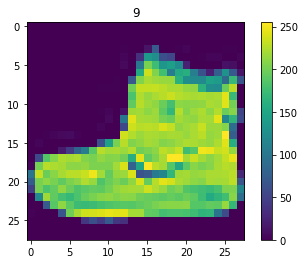

In [12]:
###EXIBIR OS DADOS
#total de classificacoes
total_classificacoes = 10

#criar um vetor com as labels conforme retorno - ja que os nomes nao estao no dataset
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

#visalizar na funcao imshow - retorna uma imagem de 28 por 28 conforme acima
plt.imshow(imagens_treino[0])
#colocar um titulo para a imagem - retorna o titulo 9
plt.title(identificacoes_treino[0])

'''
#loop para ver todoas as imagens
for imagem in range(10):
  #criar um sub grafico - sub plot
  plt.subplot(2,5, imagem+1)
  #para visualizar as classificacoes - passando uma im generica
  plt.imshow(imagens_treino[imagem])
  #para visualizar os titles - passando uma im generica - chamando a variavel de nomes de classificacoes 
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''
#melhorar o treino para otimizar o loss - ver a graduacao de cores
plt.imshow(imagens_treino[0])
#grafico de barra cores
plt.colorbar()  



##Criando, compilando, treinando e normalizando o modelo 1



In [13]:
#Modelo 1
#modelo sequencial vai ter a entrada o processamento e saida - DL
#tenho algo que nossas camadas sao sequenciais
modelo = keras.Sequential([ 
    ##camada 0
    #entrada: são as imagens (nossa imagem tem 28X28, cada um desses espacos sao chamados de pixels
    #então dividiremos os pxels para toda imagem 
    #então vamos passar a forma input_shape para transformar a imagem de 28*28 num array em 1 dimensao de 28 * 28 pxels usamos Flatter-achatamento
    keras.layers.Flatten(input_shape=(28, 28)),
    
    ##camada 1
    #processamento  - nao tem um numero certo , mas ideal multiplos de 2
    #no caso 256 processamentos que vao comunicar 
    #ativada quando a funcao relu (dentro tflow), bem usado (activation=tensorflow.nn.relu) - nn neral netw
    #ativando ela pode comecar a trabalhar 
    keras.layers.Dense(256, activation=tensorflow.nn.relu),

    ##camada 2
    #saída - usando uma camada densa 
    #tinhamos 10 categorias entao a saida sera 10 camadas
    #ativaçao dela sera com funcao softmax
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

#compilar o modelo - deve receber optimizer e loss - esses sao os mais indicados
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

#treinar o modelo
modelo.fit(imagens_treino, identificacoes_treino)

#Se o resultado nao bater é necessario instalar a versao 2.1
#!pip install tensorflow==2.1

Train on 60000 samples
60000/60000 [==============================] - 7s 109us/sample - loss: 3.7558


##Normalizando as imagens 

In [0]:
#Modelo 2
#Processo chamado de Normalizacao e adicionando mais camadas(no caso aumento de mais camadas esta aumentando a perda, ou seja piorando)
#modelo com otimizacao  - dividindo a abragencia numerica que a rede vai processar - dividir a imagem em 255 
imagens_treino = imagens_treino/float(255)

##Criando, compilando, treinando e normalizando o modelo  - mais camadas -2 




In [14]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    #keras.layers.Dense(128, activation=tensorflow.nn.relu),
    #keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

Train on 60000 samples
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4826


Compilando e Executando o modelo com mais epocas e validation split

In [79]:
#ver a metrica do que estamos ganhando - acuracia
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
               )

#modelo.fit(imagens_treino, identificacoes_treino, epochs =5, validation_split=0.2)

# validation_split - alteradno a metrica de 20% para teste 0.2
#ele mostrara val_loss e valo accuracy que são os dados da validacao que estamos fazendo

#com isso vou guardar esses valores numa variavel para grafar
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs =30, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 6s 126us/sample - loss: 0.0934 - accuracy: 0.9647 - val_loss: 0.3511 - val_accuracy: 0.9099
Epoch 2/30
48000/48000 [==============================] - 6s 124us/sample - loss: 0.0909 - accuracy: 0.9651 - val_loss: 0.3506 - val_accuracy: 0.9051
Epoch 3/30
48000/48000 [==============================] - 6s 125us/sample - loss: 0.0908 - accuracy: 0.9663 - val_loss: 0.3641 - val_accuracy: 0.9074
Epoch 4/30
48000/48000 [==============================] - 6s 122us/sample - loss: 0.0833 - accuracy: 0.9688 - val_loss: 0.3531 - val_accuracy: 0.9112
Epoch 5/30
48000/48000 [==============================] - 6s 125us/sample - loss: 0.0843 - accuracy: 0.9680 - val_loss: 0.3656 - val_accuracy: 0.9073
Epoch 6/30
48000/48000 [==============================] - 6s 128us/sample - loss: 0.0858 - accuracy: 0.9677 - val_loss: 0.3522 - val_accuracy: 0.9074
Epoch 7/30
48000/48000 [==========================

Plotando os resultados  da acuracia - modelo 2 

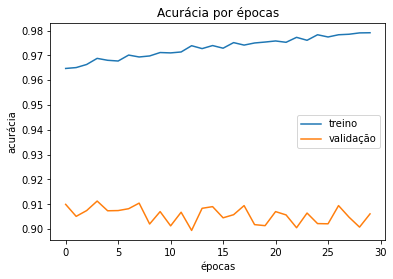

In [80]:
#Grafico da accuracia

#historico
#historico.history

#historico.history['accuracy']
#plotar o grafiro
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

Plotando os resultados  da perda - modelo 2 

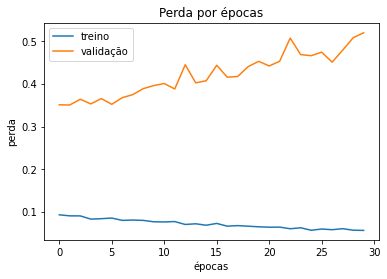

In [81]:
#Grafico da perda
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Criando, compilando, treinando e normalizando o modelo - Camada Drop out - 3 

In [82]:
#Modelo 3 - Normalizacao Tecnica  dropout - adormecendo a cada 10 unidades quero q 2 nao pegue tanto informacoes 

modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

Train on 60000 samples
60000/60000 [==============================] - 7s 122us/sample - loss: 1.0054


##Executando o modelo 3 

In [83]:
#Executando novamente o modelo
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
               )
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs =5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 130us/sample - loss: 0.6287 - accuracy: 0.7706 - val_loss: 0.5716 - val_accuracy: 0.7941
Epoch 2/5
48000/48000 [==============================] - 6s 127us/sample - loss: 0.5659 - accuracy: 0.7965 - val_loss: 0.5273 - val_accuracy: 0.8129
Epoch 3/5
48000/48000 [==============================] - 6s 131us/sample - loss: 0.5283 - accuracy: 0.8119 - val_loss: 0.4988 - val_accuracy: 0.8234
Epoch 4/5
48000/48000 [==============================] - 6s 128us/sample - loss: 0.4994 - accuracy: 0.8216 - val_loss: 0.4762 - val_accuracy: 0.8305
Epoch 5/5
48000/48000 [==============================] - 6s 128us/sample - loss: 0.4794 - accuracy: 0.8310 - val_loss: 0.4590 - val_accuracy: 0.8363


##Salvando o modelo treinado

In [0]:
#Salvando o modelo - apos as normalizacoes
modelo.save('modelo.h5')
#carregametno do modelo
modelo_salvo = load_model('modelo.h5')

##Plotando os resultados da acuracia - modelo 3

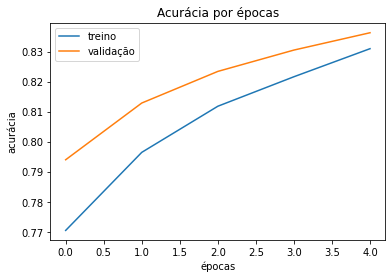

In [84]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

Plotando os resultados da perda - modelo 3

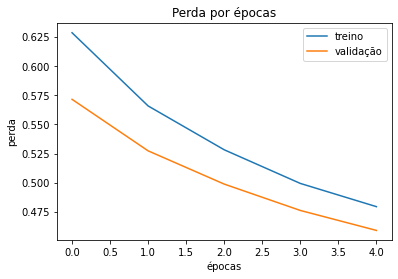

In [85]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

##Testando o modelo e o modelo salvo

In [87]:
#Serão feitos os nossos testes - novos dados
#testes recebe as imagens de testes
testes = modelo.predict(imagens_teste)

#saber o resultado do teste, pegar o maior argumento dos testes - resultado do teste - predict
print('Resultado teste: ', np.argmax(testes[1]))
#resultado real , numero da imagem e identificacao
print('Numero da imagem de teste: ', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado teste modelo salvo: ', np.argmax(testes[1]))
print('Numero da imagem de teste modelo salvo: ', identificacoes_teste[1])

Resultado teste:  2
Numero da imagem de teste:  2
Resultado teste modelo salvo:  2
Numero da imagem de teste modelo salbo:  2


#Avaliando o modelo 

In [38]:
#avaliacao dos resultados - retorna array com dois numeros (perda, accuracia)
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

print('Perda do teste ', perda_teste)
print('Acuracia do teste ', acuracia_teste)

10000/10000 [==============================] - 1s 59us/sample - loss: 62.2581 - accuracy: 0.8643
Perda do teste  62.25813336119652
Acuracia do teste  0.8643
